In [1]:
%matplotlib inline
import os
from matplotlib import colors
import matplotlib.pyplot as plt
import pandas as pd
from bokeh.io import output_notebook, show
from bokeh.models import ColumnDataSource, GMapOptions
from bokeh.plotting import gmap
from bokeh.io import export_png

output_notebook()

# For GMaps to function, Google requires you obtain and enable an API key:
#
#     https://developers.google.com/maps/documentation/javascript/get-api-key
#
# Replace the value below with your personal API key:
GOOGLE_API_KEY = 'PUT YOUR GOOGLE API KEY'

Loading BokehJS ...

In [2]:
data = [('Bangkok, Thailand', 'bangkok.csv'),
            ('Jakarta, Indonesia', 'jakarta.csv'),
            ('Lagos, Nigeria', 'lagos.csv'),
            ('Dhaka, Bangladesh', 'dhaka.csv'),
            ('Wayne, Michigan, US', 'wayne2.csv')]
for c in data:
    title = c[0]
    fn = c[1]
    df = pd.read_csv('../data/google_street_view_metadata/{0!s}'.format(fn))
    df['lat'] = df['location'].apply(lambda c: eval(c)['lat'])
    df['lng'] = df['location'].apply(lambda c: eval(c)['lng'])
    cvalues = colors.cnames.values()
    road_types = list(df.osm_type.unique())
    clat= df.lat.mean()
    clng = df.lng.mean()

    map_options = GMapOptions(lat=clat, lng=clng, map_type="roadmap", zoom=10)

    p = gmap(GOOGLE_API_KEY, map_options, title=title, plot_width=1024, plot_height=768)

    for t in road_types:
        source = ColumnDataSource(
            data=dict(lat=df[df.osm_type == t].lat.values,
                      lon=df[df.osm_type == t].lng.values)
        )
        color =  cvalues[road_types.index(t) % len(cvalues)]
        p.circle(x="lon", y="lat", size=5, fill_color=color, color=None, fill_alpha=0.8, source=source, legend=t)

    show(p)
    img_fn = '../figs/' + os.path.splitext(fn)[0] + '-gmap.png'
    print(img_fn)
    export_png(p, filename=img_fn)

../figs/bangkok-gmap.png


../figs/jakarta-gmap.png


../figs/lagos-gmap.png


../figs/dhaka-gmap.png


../figs/wayne2-gmap.png


../figs/bangkok.png


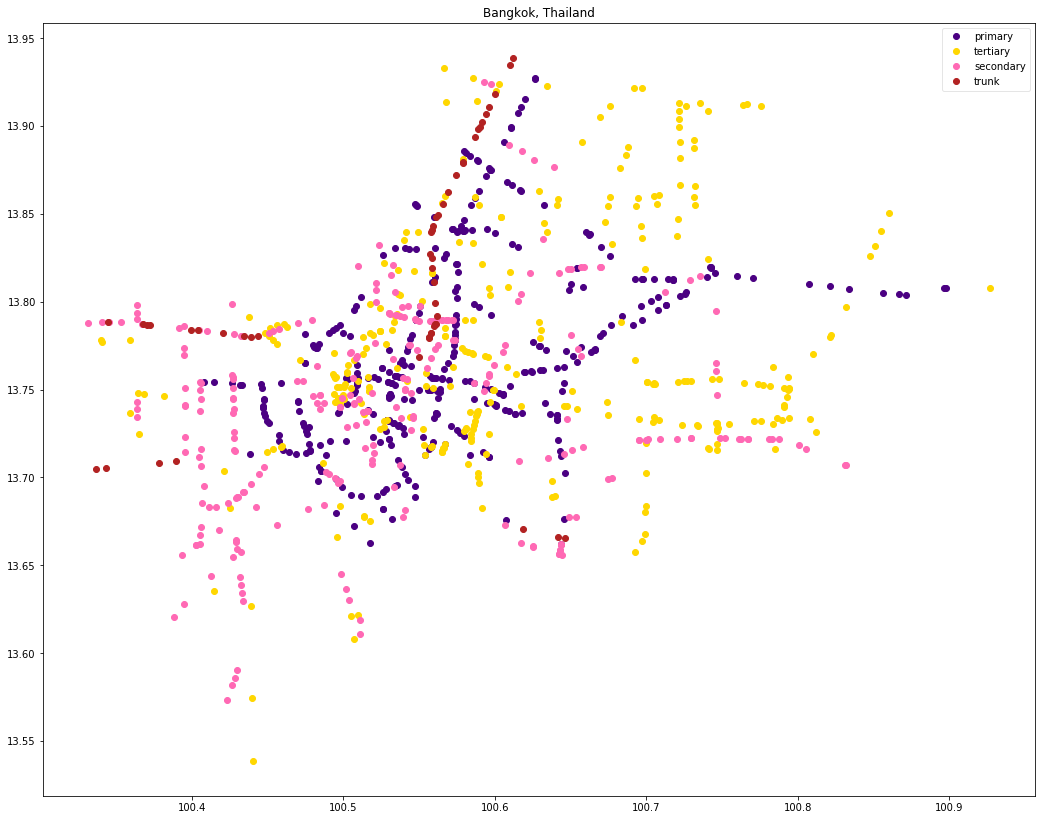

../figs/jakarta.png


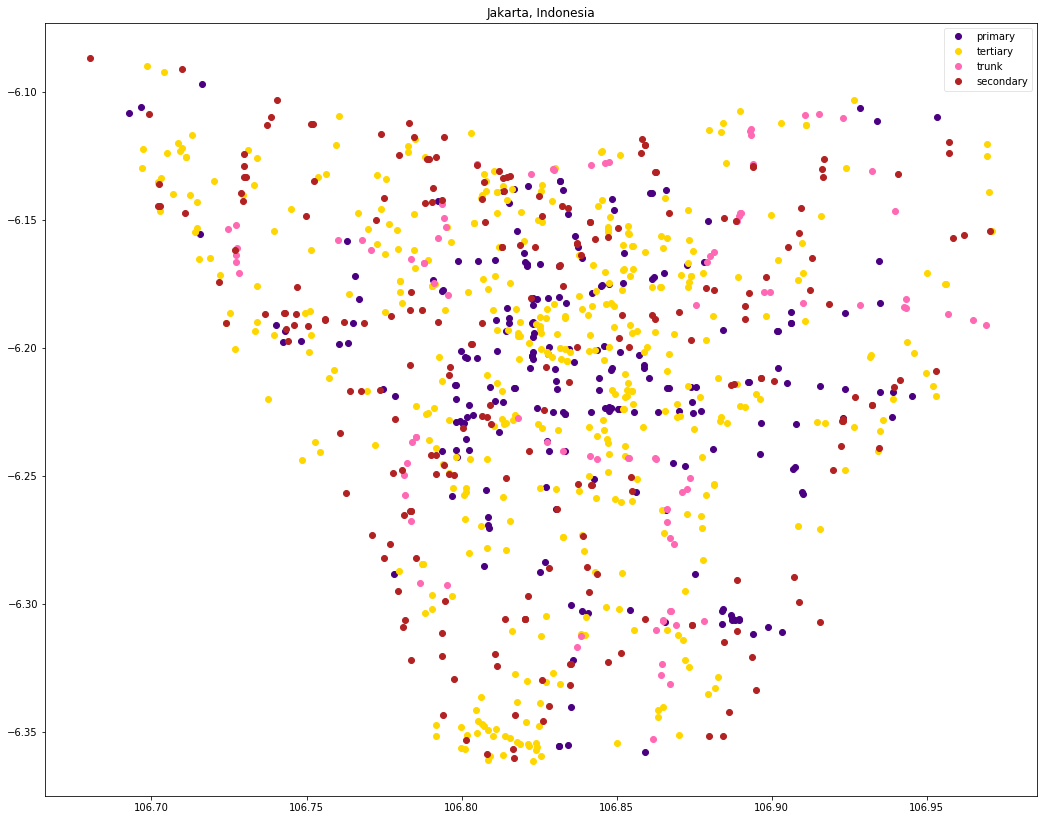

../figs/lagos.png


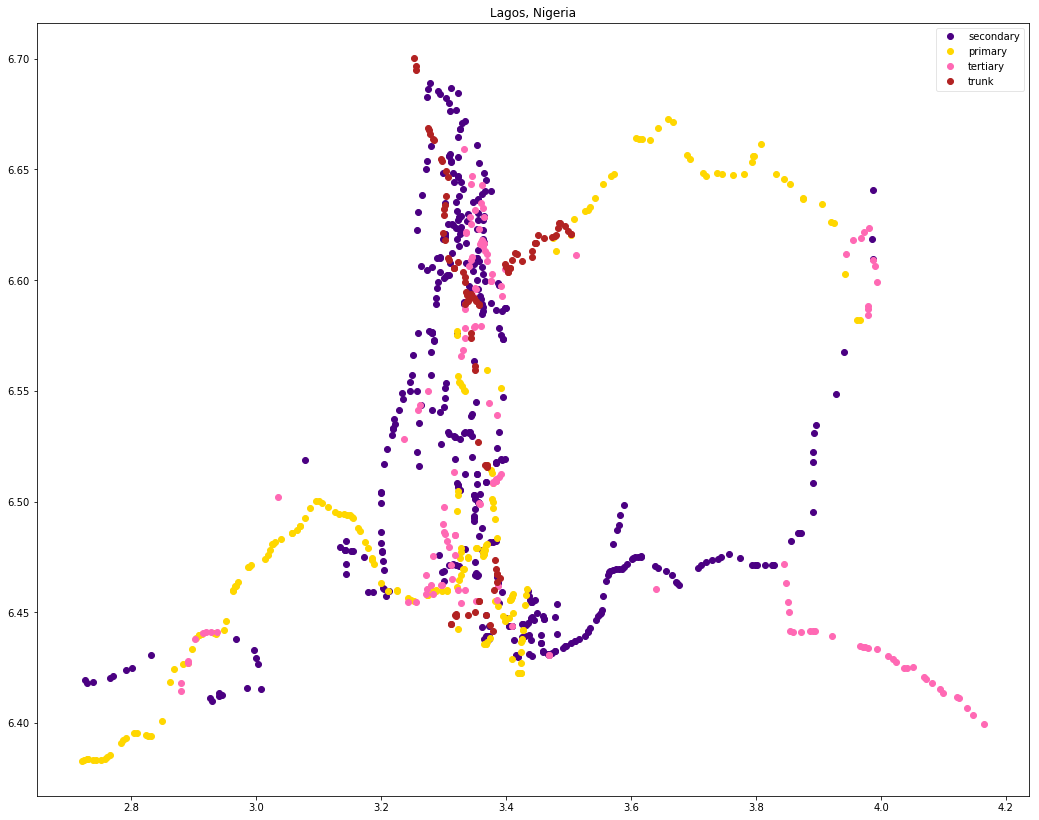

../figs/dhaka.png


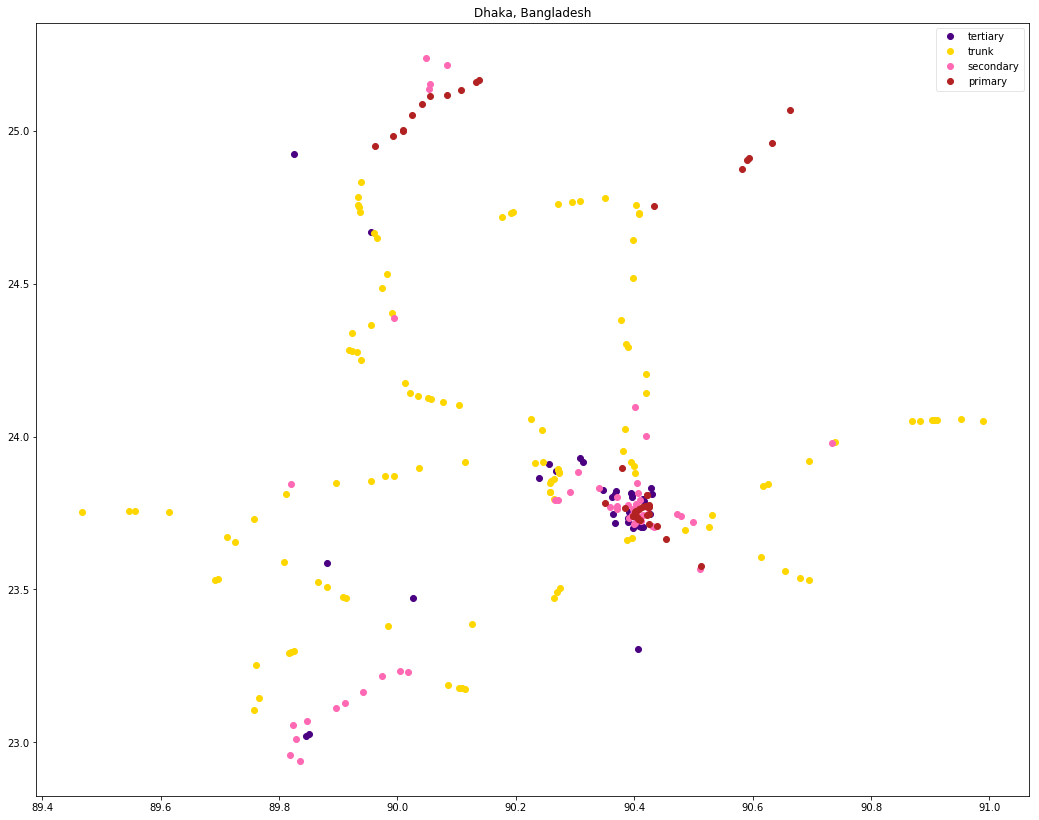

../figs/wayne2.png


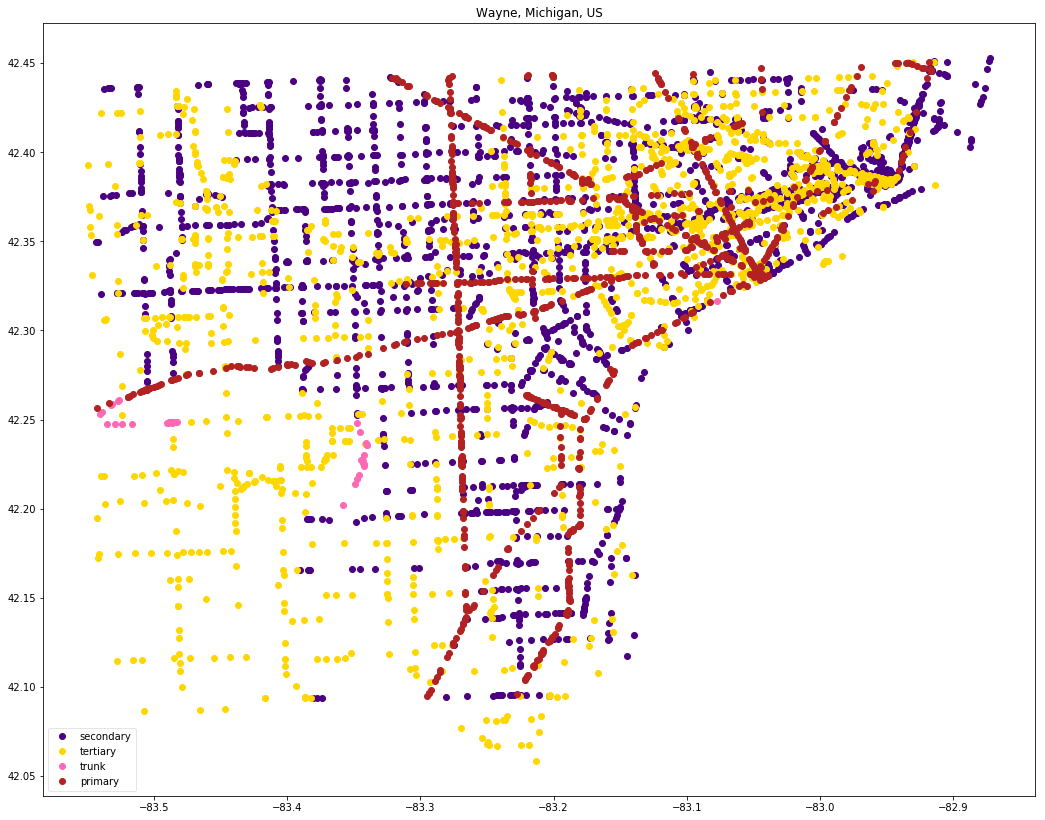

In [3]:
for c in data:
    title = c[0]
    fn = c[1]
    df = pd.read_csv('../data/google_street_view_metadata/{0!s}'.format(fn))
    df['lat'] = df['location'].apply(lambda c: eval(c)['lat'])
    df['lng'] = df['location'].apply(lambda c: eval(c)['lng'])
    cvalues = colors.cnames.values()
    road_types = list(df.osm_type.unique())
    fig, ax = plt.subplots(figsize=[17.78, 14.22])
    first = []
    for t in road_types:
        x = df[df.osm_type == t].lng.values
        y = df[df.osm_type == t].lat.values
        c = cvalues[road_types.index(t) % len(cvalues)]
        if t not in first:
            first.append(t)
            ax.plot(x, y, 'o', color=c, label=t)
        else:
            ax.plot(x, y, 'o', color=c)

    plt.legend(loc='best', fancybox=True, framealpha=0.5)
    plt.title(title)
    ax.get_yaxis().get_major_formatter().set_useOffset(False)
    ax.get_yaxis().get_major_formatter().set_scientific(False)
    ax.get_xaxis().get_major_formatter().set_useOffset(False)
    ax.get_xaxis().get_major_formatter().set_scientific(False)
    img_fn = '../figs/' + os.path.splitext(fn)[0] + '.png'
    print(img_fn)
    plt.savefig(img_fn)
    plt.show()
